### 프로젝트 기간이 짧거나 업체가 공격적으로 투자하지 않을 때 머신러닝!

## 라이브러리 정의

In [1]:
import pandas as pd
import numpy as np

In [2]:
## graphviz.. tree 보기 위해 import
from sklearn.tree import export_graphviz 

In [3]:
# 분석알고리즘 DecisionTree 구현 라이브러리. 싸이킷런.
from sklearn.tree import DecisionTreeRegressor # 설명력이 뛰어남
# RandomForestRegressor 구현 라이브러리.
from sklearn.ensemble import RandomForestRegressor

In [4]:
# 과거데이터를 8:2, 7:3 으로 자동으로 나누어주는 함수
from sklearn.model_selection import train_test_split

In [5]:
# 라벨인코더 -> 문자를 숫자로 맵핑시켜준다. 두개는 0,1 세게는 0, 1, 2 네개는 0, 1 ,2 ,3
from sklearn.preprocessing import LabelEncoder

In [6]:
## 정확도 지표들
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## 데이터 불러오기

In [7]:
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")

In [8]:
featuresData.head

<bound method NDFrame.head of            REGIONID PRODUCTGROUP      PRODUCT      ITEM  YEARWEEK  YEAR  WEEK  \
0    SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201501  2015     1   
1    SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201502  2015     2   
2    SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201503  2015     3   
3    SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201504  2015     4   
4    SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201505  2015     5   
..              ...          ...          ...       ...       ...   ...   ...   
100  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201648  2016    48   
101  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201649  2016    49   
102  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201650  2016    50   
103  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201651  2016    51   
104  SEOUL_BANK_001         PG02  PRODUCT0010  ITEM0115    201652  2016    52  

## 1. 데이터 전처리

### 1-1. 타입 통합 / 특정 숫자컬럼 추가




#### 1-1-1. 데이터 타입 통합

In [9]:
# feturesData.info()

In [10]:
# 주의할 사항은 모든 컬럼에 대해서 고정시키는걸 고려하는게 나을수도 있다.
featuresData.QTY = featuresData.QTY.astype(float)

#### 1-1-2. 특정 값 숫자컬럼 변경

### 이유 : 머신러닝 특성은 숫자형 지원. 특정 값은 숫자연산이 필요하기 때문에 숫자 형태로 변경 해야 한다.. 
   ###  - 해결 : Y -> 1, N -> 0 같이 변환

In [173]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225.0,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968.0,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209.0,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810.0,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773.0,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412.0,Y,0,Y,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955.0,N,4,Y,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800.0,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173.0,N,4,Y,0.352361


In [11]:
## LOC, NP.WHERE FUNCTION 이용하거나
featuresData["HOLIDAY_NEW"] = np.where(featuresData.HOLIDAY == "Y", 1,0)
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HOLIDAY_NEW
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225.0,Y,1,Y,0.209442,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968.0,N,4,Y,0.209442,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209.0,N,4,Y,0.208155,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810.0,Y,2,Y,0.208155,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773.0,N,4,Y,0.208155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412.0,Y,0,Y,0.421888,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955.0,N,4,Y,0.421888,0
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800.0,N,4,Y,0.352361,0
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173.0,N,4,Y,0.352361,0


In [84]:
## 이런식으로 Y, N 을 변환할 수 있따.
pd.DataFrame( featuresData.HOLIDAY.drop_duplicates() ).reset_index().rename(columns = {"index" : "HOLIDAY_NEW"})

,HOLIDAY_NEW,HOLIDAY
0,0,Y
1,1,N


In [85]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HOLIDAY_NEW
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225.0,Y,1,Y,0.209442,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968.0,N,4,Y,0.209442,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209.0,N,4,Y,0.208155,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810.0,Y,2,Y,0.208155,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773.0,N,4,Y,0.208155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412.0,Y,0,Y,0.421888,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955.0,N,4,Y,0.421888,0
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800.0,N,4,Y,0.352361,0
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173.0,N,4,Y,0.352361,0


In [86]:
## labelencoder 이용, 알아서 변환해준다.

## 라벨인코더 인스턴스 만들고
holiEn = LabelEncoder()

## 변환 실행
featuresData["HOLIDAY_LABEL_EN"] = holiEn.fit_transform(featuresData.HOLIDAY)

In [175]:
## 다시 돌리기
featuresData["HOLIDAY_DE"] = holiEn.inverse_transform(featuresData.HOLIDAY_LABEL_EN)

AttributeError: 'DataFrame' object has no attribute 'HOLIDAY_LABEL_EN'

In [176]:
## 두 컬럼값이 당연히 같아야 한다.
featuresData.loc[featuresData.HOLIDAY != featuresData.HOLIDAY_DE]

AttributeError: 'DataFrame' object has no attribute 'HOLIDAY_DE'

In [12]:
## PROMOTION도 변환.
featuresData["PROMOTION_NEW"] = np.where(featuresData.PROMOTION == "Y", 1,0)

In [180]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HOLIDAY_NEW,PROMOTION_NEW
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225.0,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968.0,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209.0,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810.0,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773.0,N,4,Y,0.208155,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412.0,Y,0,Y,0.421888,1,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955.0,N,4,Y,0.421888,0,1
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800.0,N,4,Y,0.352361,0,1
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173.0,N,4,Y,0.352361,0,1


### 1-2. 특성 선정 / 데이터 분리

#### 특성 선정
##### 이유 : 학습시킬 특성을 정의
##### 해결 : 상관관계로 확인 후 (holiday, promotion) 적용

#### 상관관계 확인 corr(). 뚜렷한 양, 음적 상관관계는 재료로 쓰기 적합하다. 절대값 0.3 ~ 0.7, 0.7 ~ 1.0

### 요악하자면,  qty랑 휴일, 홍보 유무의 상관관계를 파악

In [13]:
featuresData.corr()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HOLIDAY_NEW,PROMOTION_NEW
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HOLIDAY_NEW,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PROMOTION_NEW,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [14]:
corrDf = featuresData.corr()

In [15]:
corrDf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HOLIDAY_NEW,PROMOTION_NEW
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HOLIDAY_NEW,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PROMOTION_NEW,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


## 상관관계 계수 비율 선정.. 0.5 초과 1 미만인 경우만 고려하겠다.

In [16]:
standardLimit = 0.5

In [17]:
corrDf.loc[ ( abs( corrDf.QTY ) > standardLimit ) & ( abs( corrDf.QTY ) != 1)]

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HOLIDAY_NEW,PROMOTION_NEW
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HOLIDAY_NEW,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PROMOTION_NEW,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [18]:
corrDf.loc[abs(corrDf.QTY) > standardLimit] ## qty = 판매량.

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HOLIDAY_NEW,PROMOTION_NEW
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HOLIDAY_NEW,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PROMOTION_NEW,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [19]:
features = list( corrDf.loc[ ( abs( corrDf.QTY ) > standardLimit ) & ( abs( corrDf.QTY ) != 1) ] )

In [20]:
features

['YEARWEEK',
 'YEAR',
 'WEEK',
 'QTY',
 'HCLUS',
 'PRO_PERCENT',
 'HOLIDAY_NEW',
 'PROMOTION_NEW']

In [21]:
features = list( corrDf.loc[ ( abs( corrDf.QTY ) > standardLimit ) & ( abs( corrDf.QTY ) != 1) ].index )

In [22]:
## 이러한 특징들과 qty 와의 상관관계를 분석(0.5~1미만인 경우만)
features

['HCLUS', 'PRO_PERCENT', 'HOLIDAY_NEW', 'PROMOTION_NEW']

In [23]:
## 답지
label = ["QTY"]

In [24]:
## featuresData.drop(columns=["PROMO_DU_Y","PROMO_DU_N"], inplace=True)

### 1-2-2. 데이터 분리

In [83]:
# 105개의 행 14개의 컬럼 존재
featuresData.shape

(105, 14)

In [26]:
sortKey = ["REGIONID", "ITEM", "YEARWEEK"]

In [27]:
sortedData = featuresData.sort_values(sortKey, ignore_index=True)

In [28]:
sortedData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HOLIDAY_NEW,PROMOTION_NEW
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225.0,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968.0,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209.0,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810.0,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773.0,N,4,Y,0.208155,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412.0,Y,0,Y,0.421888,1,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955.0,N,4,Y,0.421888,0,1
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800.0,N,4,Y,0.352361,0,1
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173.0,N,4,Y,0.352361,0,1


In [29]:
## 8 : 2 로 설정. 8은 과거. 2는 예측
standardWeek = 0.8

In [30]:
sortedData.shape[0]

105

In [31]:
sortedData.shape[0] * standardWeek

84.0

In [32]:
list(sortedData.shape)[0] * standardWeek

84.0

In [33]:
## 정렬하고 80%에 있는 인덱스의 번호로 분리시킨다.
selectedIndex = int( list(sortedData.shape)[0] * standardWeek )

In [34]:
selectedIndex

84

In [35]:
yearweekStd = sortedData.loc[selectedIndex].YEARWEEK

In [36]:
yearweekStd ## 80퍼센트 기준.

201632

In [37]:
 ## 훈련데이터와 테스트데이터를 문제지와 정답지로 구분해서 정의한다.
trainingData_features = \
    featuresData.loc[featuresData.YEARWEEK <= yearweekStd, features] ## 과거 훈련정보
trainingData_label = \
    featuresData.loc[featuresData.YEARWEEK <= yearweekStd, label] ## 과거 정답정보
# 테스트 데이터
testData_features = \
    featuresData.loc[featuresData.YEARWEEK > yearweekStd, features] ## 20퍼센트 훈련정보
testData_label = \
    featuresData.loc[featuresData.YEARWEEK > yearweekStd, label] ## 위의 두 데이터를 바탕으로 훈련. 20퍼센트 훈련정보를 바탕으로 해당 줄 결과.

In [38]:
trainingData_features

,HCLUS,PRO_PERCENT,HOLIDAY_NEW,PROMOTION_NEW
0,1,0.209442,1,1
1,4,0.209442,0,1
2,4,0.208155,0,1
3,2,0.208155,1,1
4,4,0.208155,0,1
...,...,...,...,...
80,1,0.308584,1,1
81,1,0.308584,1,1
82,4,0.280258,0,1
83,4,0.280258,0,1


In [39]:
trainingData_features

,HCLUS,PRO_PERCENT,HOLIDAY_NEW,PROMOTION_NEW
0,1,0.209442,1,1
1,4,0.209442,0,1
2,4,0.208155,0,1
3,2,0.208155,1,1
4,4,0.208155,0,1
...,...,...,...,...
80,1,0.308584,1,1
81,1,0.308584,1,1
82,4,0.280258,0,1
83,4,0.280258,0,1


## 2. 모델 적용

### 2-1-1 학습

In [40]:
## 하이퍼 파라미터 튜닝. random_state를 고정시켜놓으면 랜덤속성이 고정됨으로써 항상 같은 값이 나온다.
model_dt = DecisionTreeRegressor(random_state=10)
## max_depth = 


# model_rf = RandomForestRegressor(random_state=10) 트리를 여러개 만들어 오버피팅 문제를 해야하는 방법. 여러 트리의 평균값으로 예측하는 방법.
# model_rf. estimator_[0] 으로 그래프비즈 확인.

In [41]:
model_dt.fit(X=trainingData_features, y=trainingData_label) ## 문제지와 정답지..
#model_rf.fit(X=trainingData_features, y=trainingData_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

## 3. 예측

In [42]:
predictValueDt = model_dt.predict(trainingData_features)
# predictValueRf = model_rf.predict(trainingData_features)

In [43]:
predictValueDt

array([1305.75      ,  900.5       , 1009.66666667, 1810.        ,
       1009.66666667, 1009.66666667, 1009.66666667,  970.        ,
       1009.66666667,  350.71428571, 1009.66666667, 1009.66666667,
       1009.66666667, 1009.66666667,  350.71428571,  350.71428571,
        350.71428571,  350.71428571,  350.71428571, 1305.75      ,
       1305.75      , 1305.75      ,  900.5       ,  350.71428571,
        337.        , 2620.42857143, 2620.42857143, 2620.42857143,
       2620.42857143,  350.71428571,  350.71428571,  350.71428571,
        350.71428571,  350.71428571, 1551.83333333, 1551.83333333,
       1551.83333333, 1013.        ,  350.71428571,  350.71428571,
        900.5       ,  862.        ,  900.5       ,  350.71428571,
       2193.8       , 2193.8       , 2193.8       , 2193.8       ,
       2193.8       ,  350.71428571, 1013.        , 1551.83333333,
       1551.83333333, 1013.        ,  350.71428571,   15.        ,
       1013.        , 1013.        , 1013.        , 1551.83333

In [44]:
## 리스트를 데이터프레임으로 감싸면 한 컬럼으로 된다.
predictDtDf = pd.DataFrame(list(predictValueDt), columns=["PREDICTdt"])

In [45]:
#predictRfDf = pd.DataFrame(list(predictValueRf), columns=["PREDICTrf"])

In [46]:
predictDtDf

,PREDICTdt
0,1305.750000
1,900.500000
2,1009.666667
3,1810.000000
4,1009.666667
...,...
80,1434.600000
81,1434.600000
82,1708.750000
83,1708.750000


In [223]:
predictRfDf

NameError: name 'predictRfDf' is not defined

## 4. 데이터 정리

In [47]:
predictDtDf = pd.DataFrame(list(predictValueDt), columns=["PREDICTdt"])
#predictRfDf = pd.DataFrame(list(predictValueRf), columns=["PREDICTrf"])

In [48]:
## 정답지와 비교........ ...과거의 답과                            훈련데이터   훈련데이터
validateDf = pd.concat( [testData_label.reset_index(drop=True), predictDtDf], axis=1)

In [49]:
selectedDf = validateDf.loc[:, ["QTY", "PREDICTdt"]]

In [50]:
selectedDf

,QTY,PREDICTdt
0,43.0,1305.750000
1,1700.0,900.500000
2,1514.0,1009.666667
3,1501.0,1810.000000
4,1491.0,1009.666667
...,...,...
80,NaN,1434.600000
81,NaN,1434.600000
82,NaN,1708.750000
83,NaN,1708.750000


## 5. 정확도 검증

In [228]:
# MAE 지표
DtMae = mean_absolute_error( selectedDf['QTY'], selectedDf['PREDICTdt'])  

print(DtMae)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [229]:
# RMSE 지표
DtRmse = np.sqrt(mean_squared_error(y_true = selectedDf['QTY'], 
                                   y_pred = selectedDf['PREDICT']) )

print(DtRmse)

KeyError: 'PREDICT'

In [61]:
## 루트로 감싸기 np.sqrt
rmseDt = np.sqrt(mean_squared_error(y_true = selectedDf.QTY, y_pred=selectedDf.PREDICTdt) )
rmseRf = np.sqrt(mean_squared_error(y_true = selectedDf.QTY, y_pred=selectedDf.PREDICTrf) )

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [62]:
mae

NameError: name 'mae' is not defined

In [63]:
rmse

NameError: name 'rmse' is not defined

In [64]:
## Automl -> 모델을 기계가 알야서 선택해 달라는 것.

### DecisionTree - > 과거의 경험치를 그대로 반영한다.
###                  변동성이 큰 데이터에서 강하다.. 설명력이 강하다. 

### 단점 - > 오버피팅.. 너무 과거에 얽매여 있다...

### randomforest - > decisiontree의 오버피팅 해결
### 단점 - > 설명력 낮다.

In [65]:
RandomForestRegressor

sklearn.ensemble._forest.RandomForestRegressor

In [66]:
model_rf = RandomForestRegressor(random_state=10)

In [67]:
model

NameError: name 'model' is not defined

In [68]:
model.fit(X=trainingDataFeatures, y=trainingDataLabel)

NameError: name 'model' is not defined

In [69]:
predictValue = model.predict(testDataFeatures)
rfPredictDf = pd.DataFrame(list(predictValue), columns=["PREDICT"])

NameError: name 'model' is not defined

In [64]:
RandomForestRegressor

sklearn.ensemble._forest.RandomForestRegressor

## 6. graphviz

In [51]:
from sklearn.externals.six import StringIO

C:\Users\PC01\anaconda3\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


In [52]:
from sklearn.tree import export_graphviz

In [53]:
traingingDataFeatures.loc[trainingDataFeatures > 0.259]

NameError: name 'traingingDataFeatures' is not defined

In [54]:
features[1]

'PRO_PERCENT'

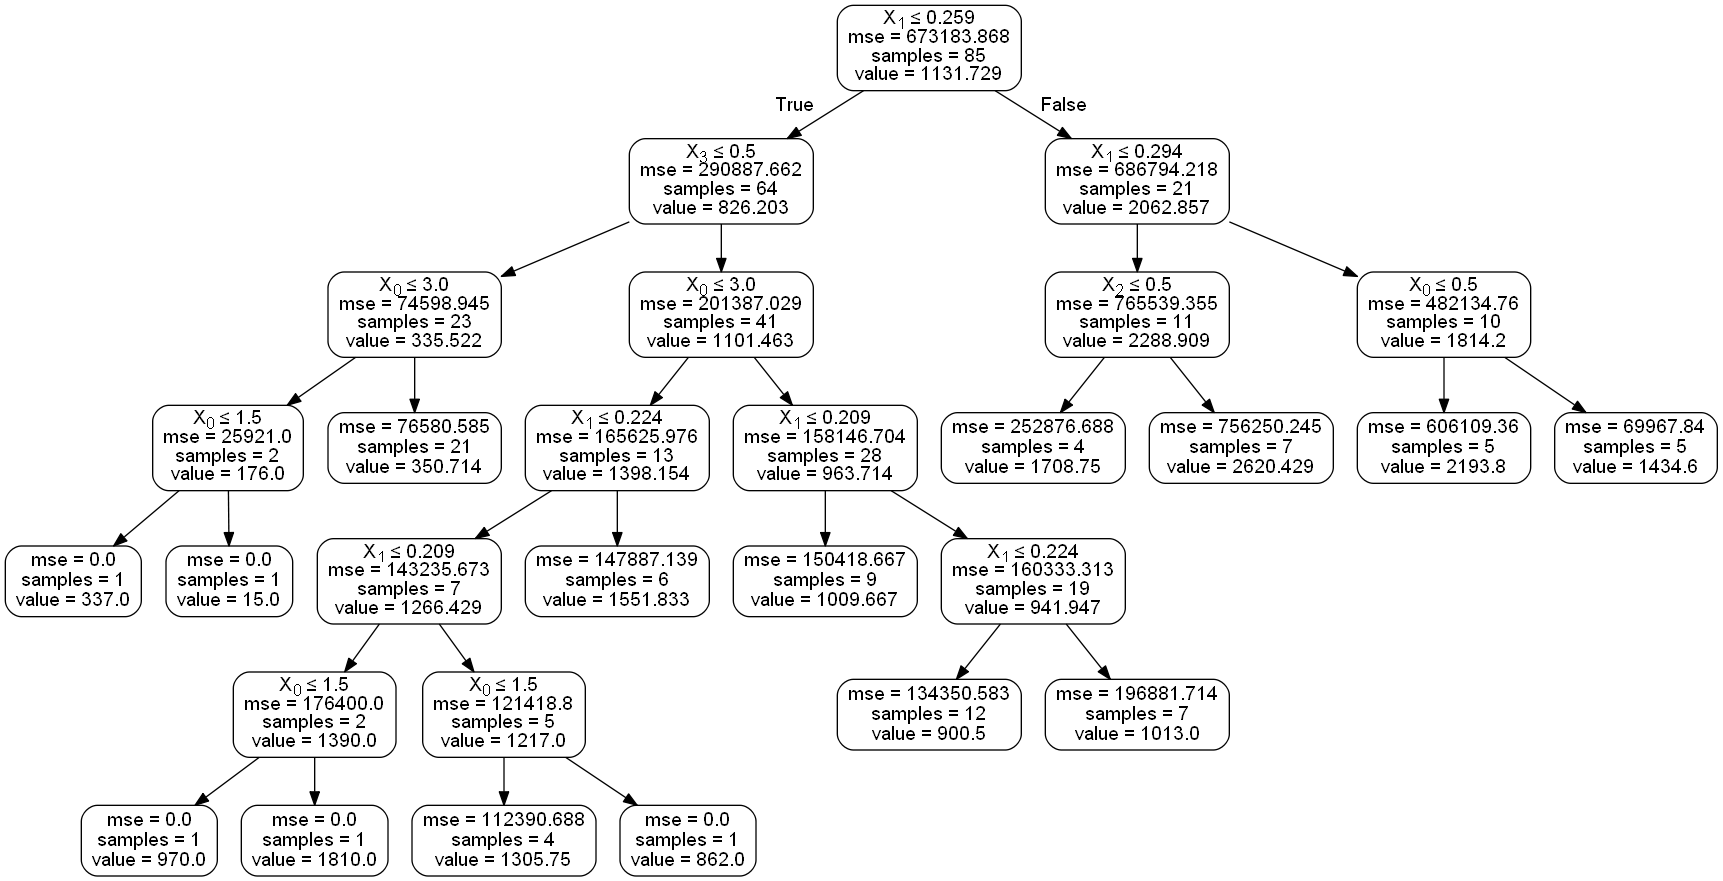

In [55]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## 맨 위에 있는 X1은 features[i] = pro_percent. 그 첫번째 기준이 x1 <= 0.259

## picke로 ~

FileNotFoundError: [Errno 2] No such file or directory: 'finalized_model.sav'

In [58]:
import sys

import pickle

In [58]:
# loadedModel= "finalized_model.sav"

# loaded_model2 = pickle.load(open(loadedModel, 'rb'))

# loaded_model2


## 대휴일 1 소휴일 4
userInputHCLUS = 1

## 제품 할인 %
userInputProPercent=0.5

# 홀리데이 유무(1,0)
userInputHoilidayYn = 1

# 프로모션 유무(1,0)
userInputPromotionYn = 1

futureData = pd.DataFrame([[ userInputHCLUS,
              userInputProPercent,
              userInputHoilidayYn,
              userInputPromotionYn]]   )


model_dt.predict(futureData)

array([1434.6])

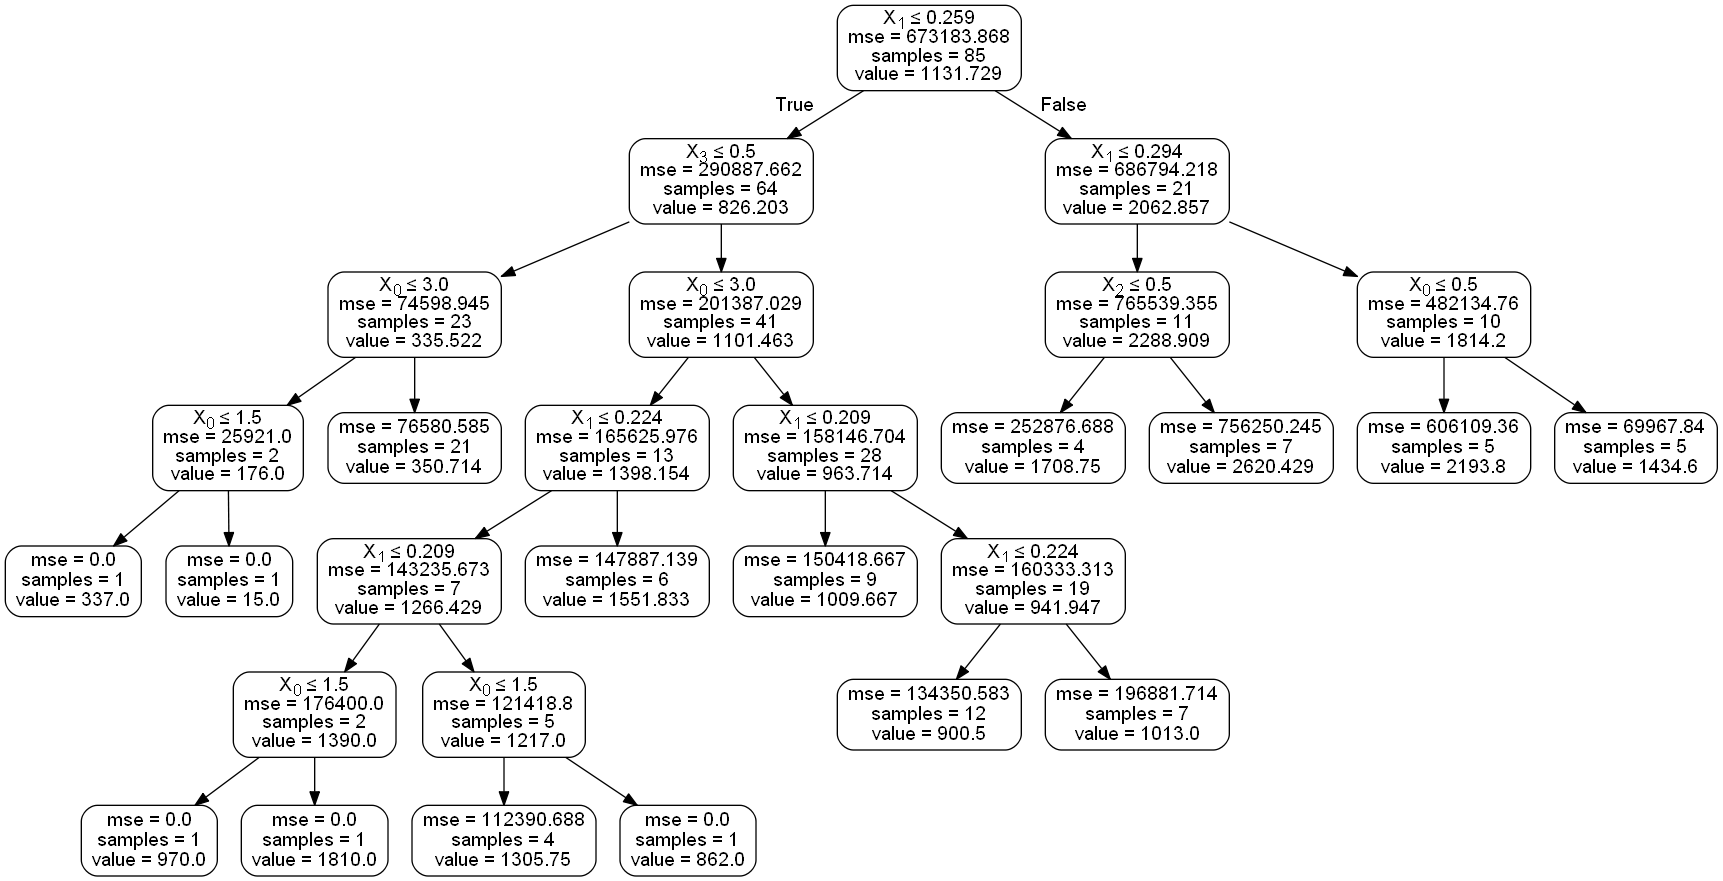

In [67]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [157]:
# pickle 파일로 저장가능하다.

print(loaded_model2.predict(futureData))

FileNotFoundError: [Errno 2] No such file or directory: 'finalized_model.sav'

In [74]:
## 대휴일 1 소휴일 4
userInputHCLUS = 1

## 제품 할인 %
userInputProPercent=0.5

# 홀리데이 유무(1,0)
userInputHoilidayYn = 1

# 프로모션 유무(1,0)
userInputPromotionYn = 0

futureData = pd.DataFrame([[ userInputHCLUS,
              userInputProPercent,
              userInputHoilidayYn,
              userInputPromotionYn]]   )



model_dt.predict(futureData)

array([1434.6])

In [75]:
treeStep1 = trainingDataFeatures.loc[trainingDataFeatures.PRO_PERCENT > 0.259]

treeStep2 = treeStep1.loc[treeStep1.PRO_PERCENT > 0.294]

treeStep3  = treeStep2.loc[treeStep2.HCLUS > 0.5]

treeStep3

treeStep3.index

trainingDataLabel.loc[treeStep3.index].QTY.mean()

NameError: name 'trainingDataFeatures' is not defined

## Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
## 랜덤이 없다. 리니어모델은. 변동성이 약한 데이터에서는 강한 모습. 변동성이 크면 mae가 커진다. (오류 ^^)
model_lr = LinearRegression()

In [80]:
model_lr.fit(X=trainingData_features, y=trainingData_label) ## 문제지와 정답지..

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
predictValueLr = model_lr.predict(testData_features)

In [82]:
predictValueLr

array([[ 302.382057  ],
       [2042.08737339],
       [2042.08737339],
       [2042.08737339],
       [1678.58790663],
       [1678.58790663],
       [1480.69443745],
       [1480.69443745],
       [1879.40765977],
       [1480.69443745],
       [ 302.382057  ],
       [2798.44750151],
       [2798.44750151],
       [2798.44750151],
       [2798.44750151],
       [2798.44750151],
       [2470.1617903 ],
       [1984.42327061],
       [1984.42327061],
       [2347.92273738]])